In [17]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
Data = load_boston()
X = Data['data']
y = Data['target']
X = scale(X)
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [14]:
steps = np.linspace(1, 20, 200)

In [15]:
from sklearn.model_selection import KFold
kf = KFold(random_state = 42, shuffle = True)
kf.get_n_splits(X)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

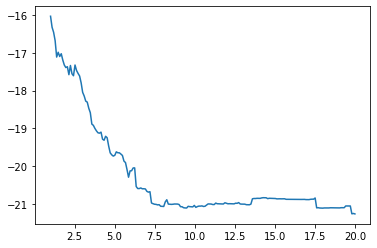

In [27]:
x_coords = []
y_coords = []
for i in steps:
    classifier = KNeighborsRegressor(n_neighbors = 5, weights = 'distance', p = i)
    quality = cross_val_score(classifier, X, y, cv=kf, scoring='neg_mean_squared_error')
    y_coords.append(np.mean(quality))
    x_coords.append(i)
plt.plot(x_coords, y_coords)